# Exploratory Data Analysis (EDA)

This notebook explores the airline delay dataset to:
- Understand the structure of the data
- Validate KPI definitions
- Identify delay patterns by airline, airport, and time
- Generate insights for operational decision support


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
DATA_PATH = "Airline_Delay_Cause - Sample.csv"

df = pd.read_csv(DATA_PATH)
df.head()


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [3]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150953 entries, 0 to 150952
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 150953 non-null  int64  
 1   month                150953 non-null  int64  
 2   carrier              150953 non-null  object 
 3   carrier_name         150953 non-null  object 
 4   airport              150953 non-null  object 
 5   airport_name         150953 non-null  object 
 6   arr_flights          150744 non-null  float64
 7   arr_del15            150543 non-null  float64
 8   carrier_ct           150744 non-null  float64
 9   weather_ct           150744 non-null  float64
 10  nas_ct               150744 non-null  float64
 11  security_ct          150744 non-null  float64
 12  late_aircraft_ct     150744 non-null  float64
 13  arr_cancelled        150744 non-null  float64
 14  arr_diverted         150744 non-null  float64
 15  arr_delay        

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,150953.000000,150953.000000,150744.000000,150543.000000,150744.000000,150744.000000,150744.000000,150744.000000,150744.000000,150744.000000,150744.000000,150744.000000,150744.000000,150744.000000,150744.000000,150744.000000,150744.000000
mean,2019.220479,6.336144,356.219073,64.042400,20.329131,2.243993,18.647560,0.161071,22.575291,7.502110,0.851934,4181.495277,1439.475017,227.030476,897.989684,7.619321,1609.375982
std,2.399465,3.420585,981.869949,174.183337,50.171666,7.354803,59.702199,0.739258,68.776246,44.605428,3.732017,12586.021401,4294.649048,837.380235,3377.950580,43.053126,5141.785596
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,48.000000,6.000000,2.000000,0.000000,1.000000,0.000000,1.020000,0.000000,0.000000,316.000000,103.000000,0.000000,30.000000,0.000000,59.000000
50%,2019.000000,6.000000,95.000000,16.000000,6.030000,0.380000,3.620000,0.000000,4.670000,1.000000,0.000000,980.000000,361.000000,17.000000,136.000000,0.000000,302.000000
75%,2021.000000,9.000000,243.000000,45.000000,16.500000,1.850000,11.000000,0.000000,14.430000,4.000000,1.000000,2804.000000,1089.000000,147.000000,451.000000,0.000000,1038.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,160.000000,438783.000000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


## Key Columns Used for KPIs
This section validates the presence and consistency of columns used
for KPI calculations.


In [4]:
kpi_columns = [
    "arr_flights",
    "arr_del15",
    "arr_delay",
    "arr_cancelled",
    "carrier_delay",
    "weather_delay",
    "nas_delay",
    "security_delay",
    "late_aircraft_delay"
]

df[kpi_columns].isnull().sum()


arr_flights            209
arr_del15              410
arr_delay              209
arr_cancelled          209
carrier_delay          209
weather_delay          209
nas_delay              209
security_delay         209
late_aircraft_delay    209
dtype: int64

In [5]:
df["otp"] = (df["arr_flights"] - df["arr_del15"]) / df["arr_flights"]
df["otp"].describe()


count    150543.000000
mean          0.820332
std           0.109553
min           0.000000
25%           0.763245
50%           0.833333
75%           0.893341
max           1.000000
Name: otp, dtype: float64

In [6]:
df["delay_rate"] = df["arr_del15"] / df["arr_flights"]
df["delay_rate"].describe()


count    150543.000000
mean          0.179668
std           0.109553
min           0.000000
25%           0.106659
50%           0.166667
75%           0.236755
max           1.000000
Name: delay_rate, dtype: float64

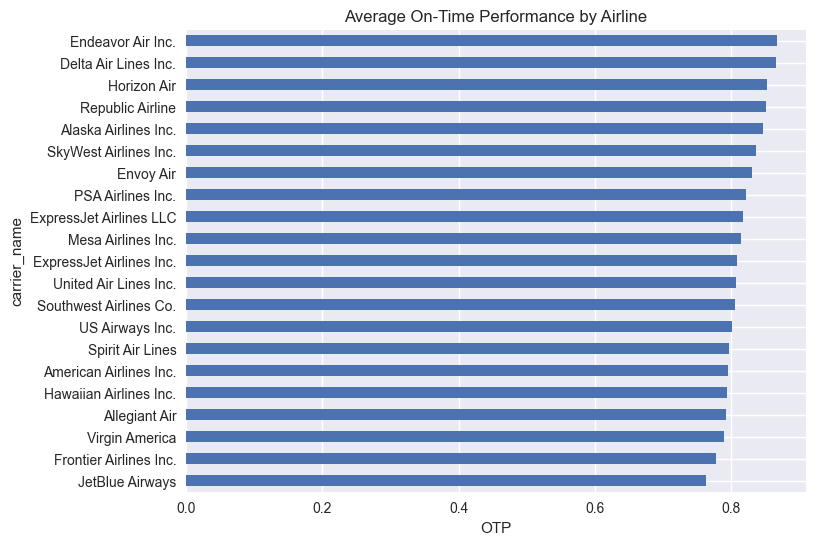

In [7]:
otp_by_airline = (
    df.groupby("carrier_name")["otp"]
    .mean()
    .sort_values()
)

otp_by_airline.plot(kind="barh", figsize=(8,6))
plt.title("Average On-Time Performance by Airline")
plt.xlabel("OTP")
plt.show()


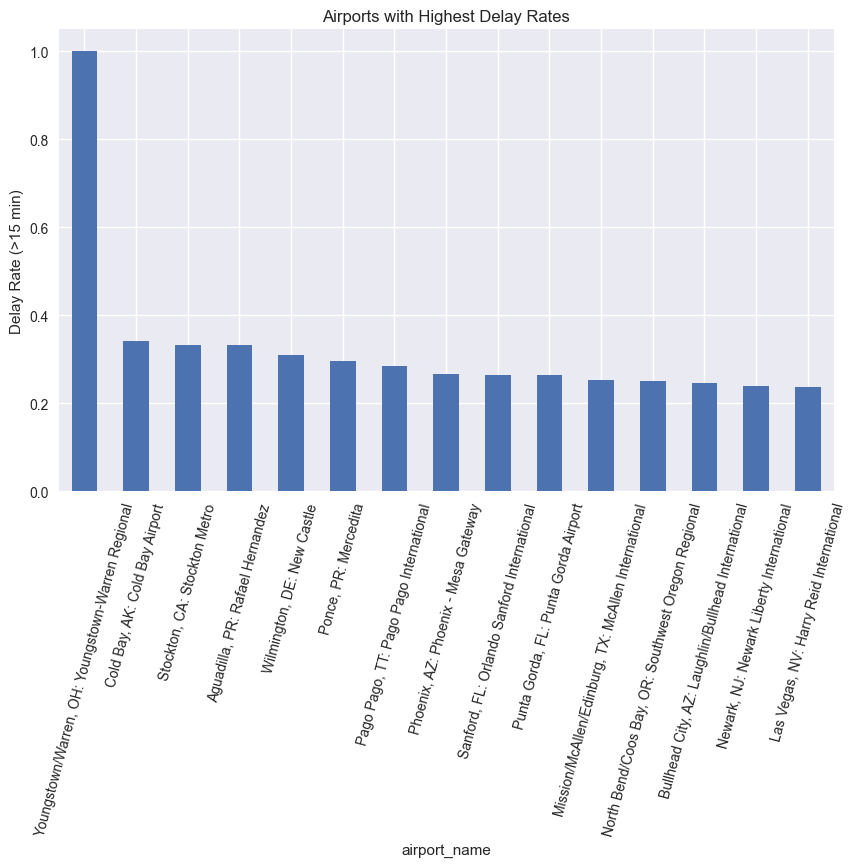

In [8]:
delay_by_airport = (
    df.groupby("airport_name")["delay_rate"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

delay_by_airport.plot(kind="bar", figsize=(10,6))
plt.title("Airports with Highest Delay Rates")
plt.ylabel("Delay Rate (>15 min)")
plt.xticks(rotation=75)
plt.show()


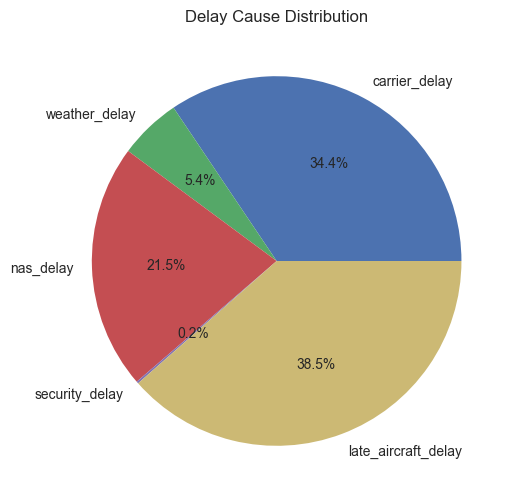

In [9]:
delay_causes = df[
    [
        "carrier_delay",
        "weather_delay",
        "nas_delay",
        "security_delay",
        "late_aircraft_delay"
    ]
].sum()

delay_causes.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Delay Cause Distribution")
plt.ylabel("")
plt.show()


## Key Observations

- On-time performance varies significantly across airlines and airports
- A small number of airports account for a disproportionate share of delays
- Late aircraft and NAS delays are major contributors to total delay minutes
- These patterns suggest opportunities for targeted operational interventions
